### Самостоятельная работа по главе 7 "Гауссовы процессы"

In [1]:
import numpy as np
import pymc3 as pm
import arviz as az
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import tqdm
from scipy import stats

sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
%load_ext watermark
%watermark --iversions

seaborn   : 0.11.1
pymc3     : 3.10.0
pandas    : 1.1.4
matplotlib: 3.3.3
tqdm      : 4.42.1
numpy     : 1.19.2
scipy     : 1.5.2
arviz     : 0.11.1



Task 1.

---
Изучая пример в разделе «Ковариационные функции и ядра», убедитесь в том, что вы полностью понимаете отношение между входными данными data и сгенерированной ковариационной матрицей. Попробуйте использовать другие входные данные, например data = `np.random.normal(size=4)`.


In [3]:
def exp_quad_kernel(x, knots, l=1):
    """exponentiated quadratic kernel"""
    return np.array([np.exp(-(x-k)**2 / (2*l**2)) for k in knots])

In [4]:
def plot_kernel_result(data, cov):
    
    _, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax = np.ravel(ax)

    ax[0].plot(data, np.zeros_like(data), 'ko')
    ax[0].set_yticks([])

    for idx, i in enumerate(data):
        ax[0].text(i, 0+0.005, idx)

    ax[0].set_xticks(data)
    ax[0].set_xticklabels(np.round(data, 2))
    #ax[0].set_xticklabels(np.round(data, 2), rotation=70)

    ax[1].grid(False)
    im = ax[1].imshow(cov)
    colors = ['w', 'k']

    for i in range(len(cov)):
        for j in range(len(cov)):
            ax[1].text(j, i, round(cov[i, j], 2),
            color=colors[int(im.norm(cov[i, j]) > 0.5)],
            ha='center', va='center', fontdict={'size': 16})

    ax[1].set_xticks(range(len(data)))
    ax[1].set_yticks(range(len(data)))
    ax[1].xaxis.tick_top()

[ 0.56513899  1.62221828 -0.91101053 -1.93314811]


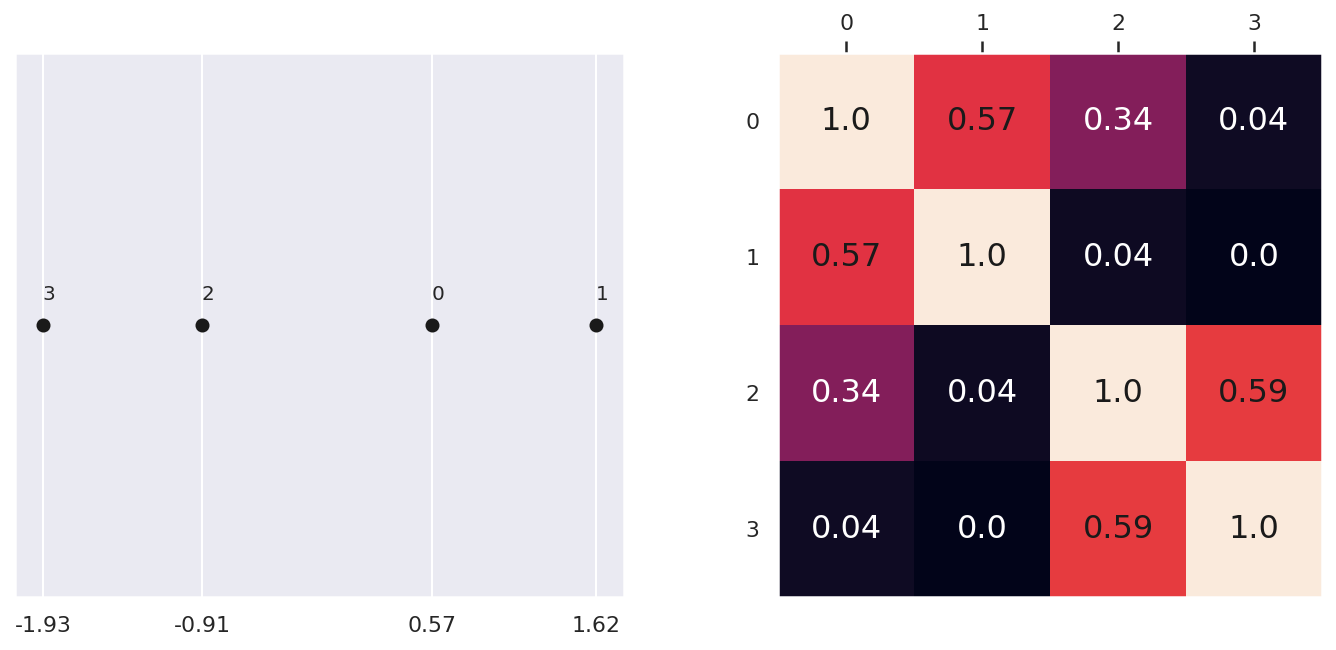

In [5]:
data = np.random.normal(size=4)
cov = exp_quad_kernel(data, data, 1)
plot_kernel_result(data, cov)
print(data)

[0.838222   0.87084943 0.35533995 0.85412098]


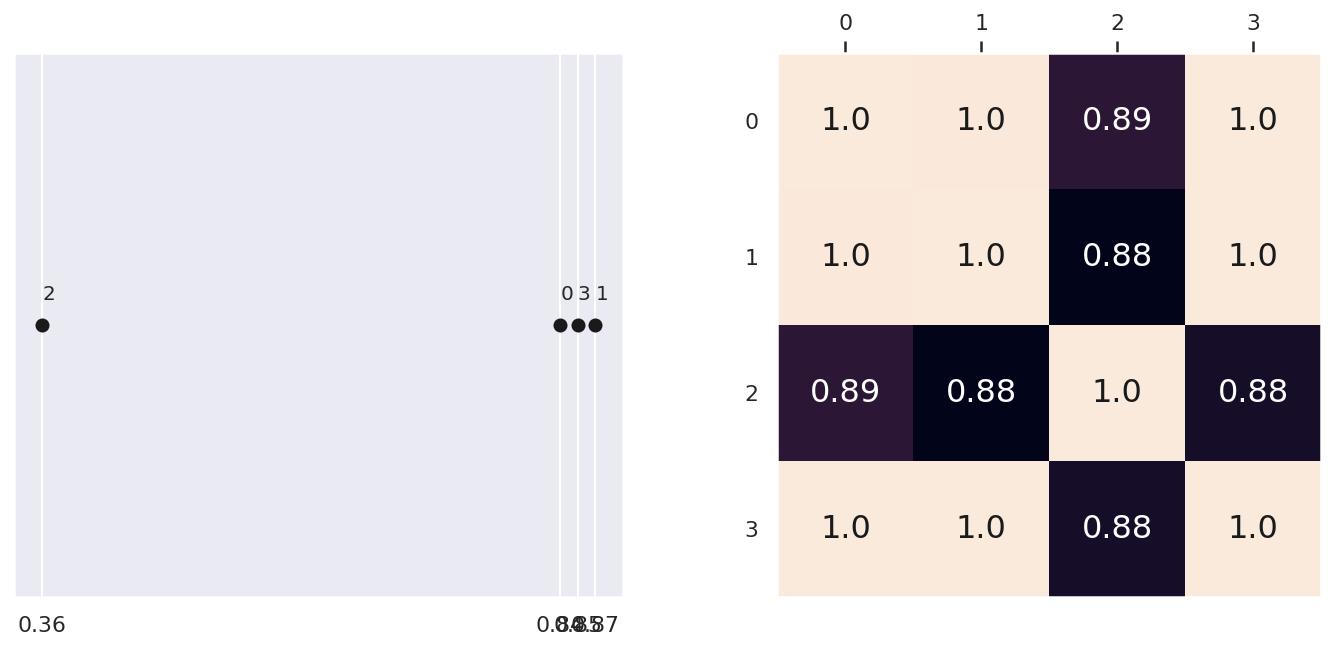

In [6]:
data = np.random.uniform(size=4)
cov = exp_quad_kernel(data, data, 1)
plot_kernel_result(data, cov)
print(data)

Task 2.

---

Повторите выполнение кода, генерирующего диаграмму на `рис. 7.3`,
с увеличением количества выборок из априорного распределения гауссова процесса приблизительно до 200. На первоначальной диаграмме количество выборок равно 2. Каков диапазон сгенерированных значений $y$?

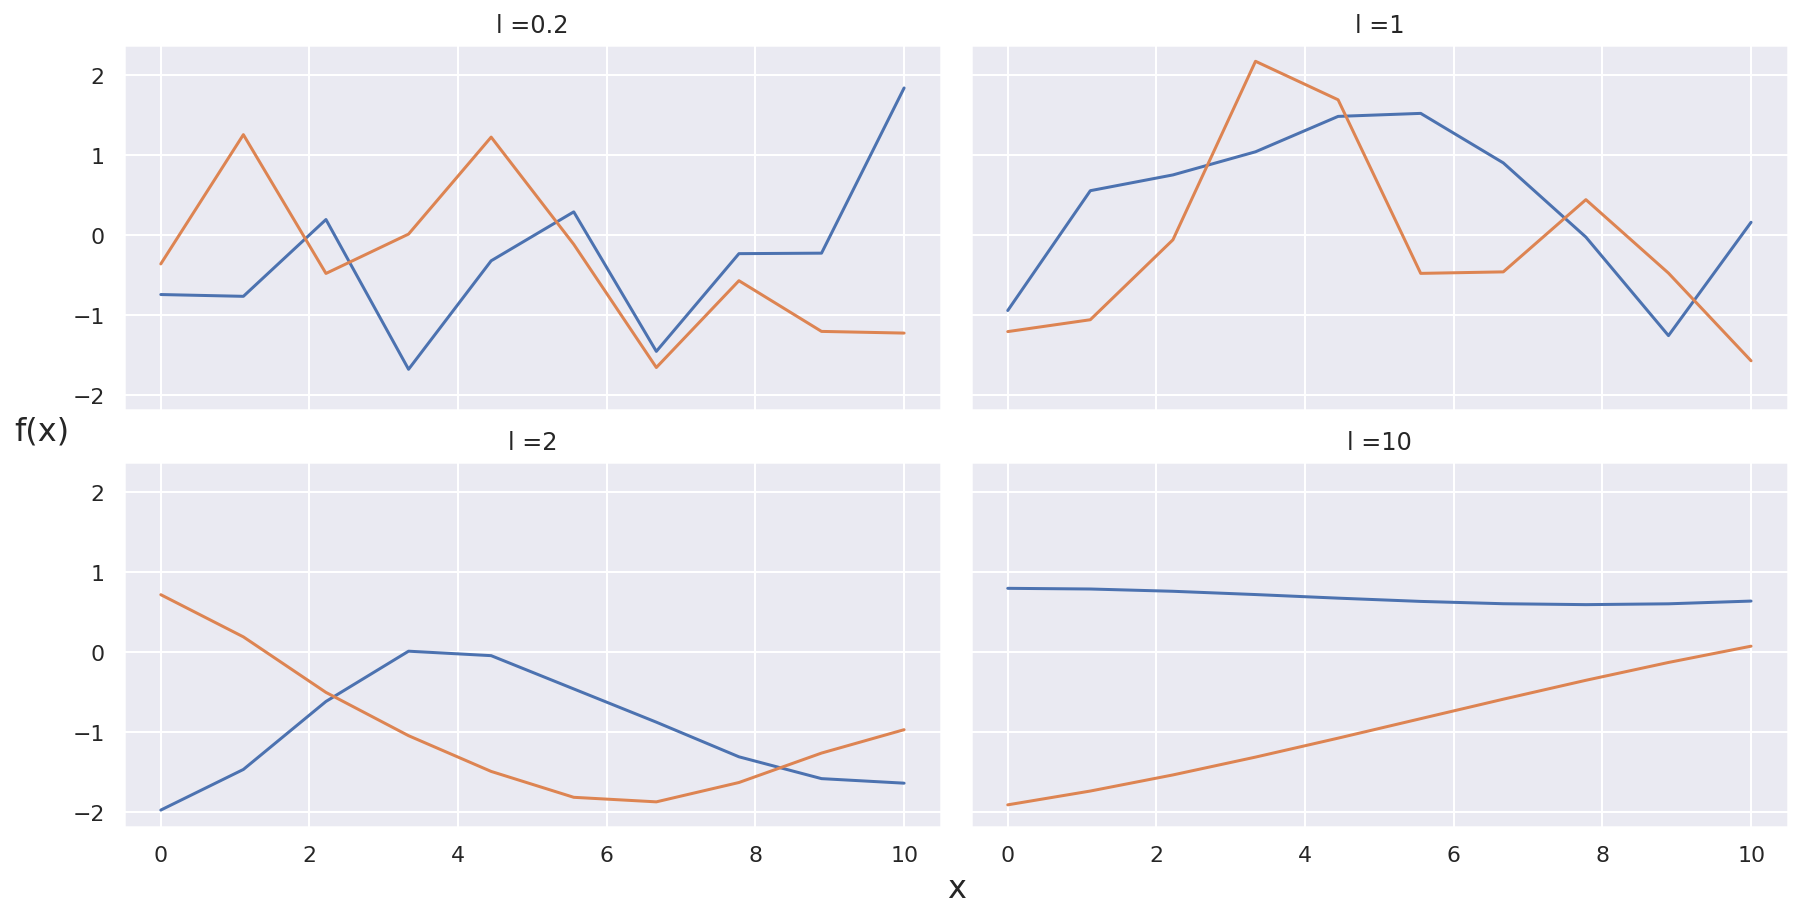

In [7]:
np.random.seed(24)
test_points = np.linspace(0, 10, 10)
fig, ax = plt.subplots(2, 2, figsize=(12, 6), sharex=True, sharey=True, constrained_layout=True)
ax = np.ravel(ax)

for idx, l in enumerate((0.2, 1, 2, 10)):
    cov = exp_quad_kernel(test_points, test_points, l)
    ax[idx].plot(test_points, stats.multivariate_normal.rvs(cov=cov, size=2).T)
    ax[idx].set_title(f'l ={l}')
    
fig.text(0.51, -0.03, 'x', fontsize=16)
fig.text(-0.03, 0.5, 'f(x)', fontsize=16)
plt.show()

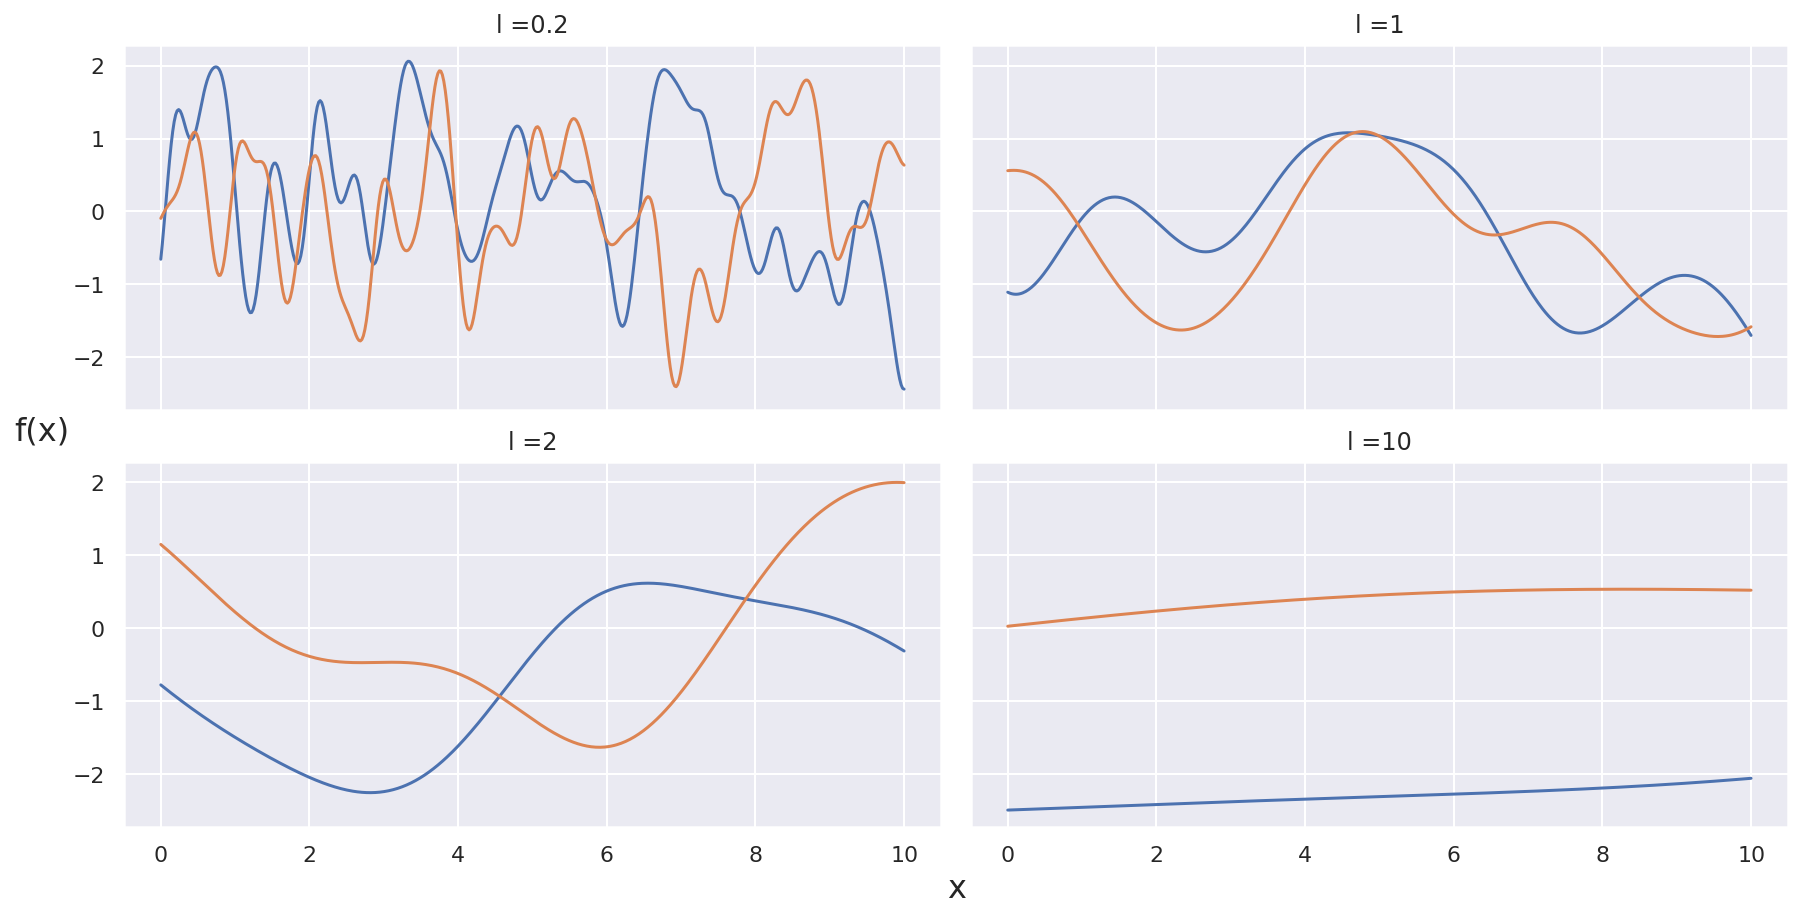

In [8]:
np.random.seed(24)
test_points = np.linspace(0, 10, 500)
fig, ax = plt.subplots(2, 2, figsize=(12, 6), sharex=True, sharey=True, constrained_layout=True)
ax = np.ravel(ax)

for idx, l in enumerate((0.2, 1, 2, 10)):
    cov = exp_quad_kernel(test_points, test_points, l)
    ax[idx].plot(test_points, stats.multivariate_normal.rvs(cov=cov, size=2).T)
    ax[idx].set_title(f'l ={l}')
    
fig.text(0.51, -0.03, 'x', fontsize=16)
fig.text(-0.03, 0.5, 'f(x)', fontsize=16)
plt.show()

Task 3.

---

Для диаграммы, сгенерированной в упражнении 2, вычислите стандартное отклонение для значений $y$ в каждой точке данных. Выполните это
в следующих формах:
* визуально, наблюдая диаграммы;
* непосредственно по значениям, сгенерированным из stats.multivariate_normal.rvs;
* исследуя ковариационную матрицу (если возникают какие-либо затруднения, вернитесь к упражнению 1).

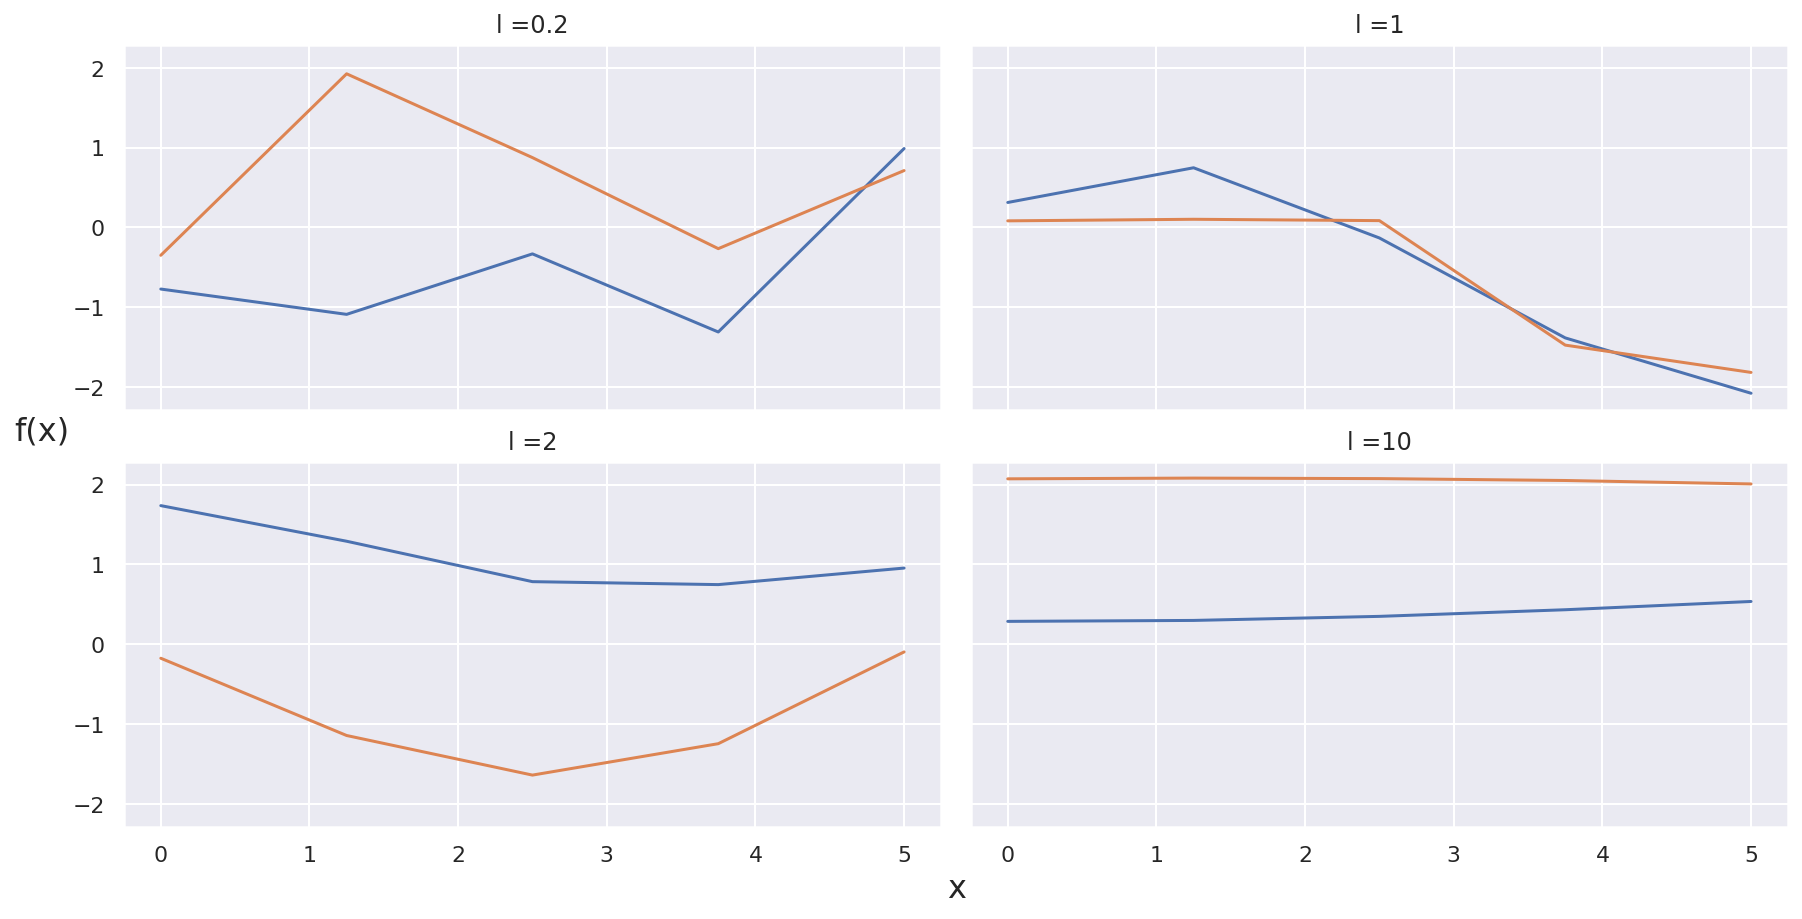

In [9]:
np.random.seed(24)
test_points = np.linspace(0, 5, 5)
fig, ax = plt.subplots(2, 2, figsize=(12, 6), sharex=True, sharey=True, constrained_layout=True)
ax = np.ravel(ax)

std_dict = {}
cov_dict = {}
for idx, l in enumerate((0.2, 1, 2, 10)):
    cov = exp_quad_kernel(test_points, test_points, l)
    cov_dict.update({l: cov})
    
    vals = stats.multivariate_normal.rvs(cov=cov, size=2).T
    std_dict.update({l: np.std(vals)})
    
    ax[idx].plot(test_points, vals)
    ax[idx].set_title(f'l ={l}')
    
fig.text(0.51, -0.03, 'x', fontsize=16)
fig.text(-0.03, 0.5, 'f(x)', fontsize=16)
plt.show()

In [10]:
std_dict

{0.2: 0.9870690818365281,
 1: 0.9654536895536779,
 2: 1.1049346031708263,
 10: 0.8415747365710428}

In [11]:
pd.DataFrame(cov_dict[0.2])

,0,1,2,3,4
0,1.000000e+00,3.293714e-09,1.176911e-34,4.562187e-77,1.918556e-136
1,3.293714e-09,1.000000e+00,3.293714e-09,1.176911e-34,4.562187e-77
2,1.176911e-34,3.293714e-09,1.000000e+00,3.293714e-09,1.176911e-34
3,4.562187e-77,1.176911e-34,3.293714e-09,1.000000e+00,3.293714e-09
4,1.918556e-136,4.562187e-77,1.176911e-34,3.293714e-09,1.000000e+00


In [12]:
pd.DataFrame(cov_dict[1])

,0,1,2,3,4
0,1.000000,0.457833,0.043937,0.000884,0.000004
1,0.457833,1.000000,0.457833,0.043937,0.000884
2,0.043937,0.457833,1.000000,0.457833,0.043937
3,0.000884,0.043937,0.457833,1.000000,0.457833
4,0.000004,0.000884,0.043937,0.457833,1.000000


In [13]:
pd.DataFrame(cov_dict[2])

,0,1,2,3,4
0,1.000000,0.822578,0.457833,0.172422,0.043937
1,0.822578,1.000000,0.822578,0.457833,0.172422
2,0.457833,0.822578,1.000000,0.822578,0.457833
3,0.172422,0.457833,0.822578,1.000000,0.822578
4,0.043937,0.172422,0.457833,0.822578,1.000000


In [14]:
pd.DataFrame(cov_dict[10])

,0,1,2,3,4
0,1.000000,0.992218,0.969233,0.932102,0.882497
1,0.992218,1.000000,0.992218,0.969233,0.932102
2,0.969233,0.992218,1.000000,0.992218,0.969233
3,0.932102,0.969233,0.992218,1.000000,0.992218
4,0.882497,0.932102,0.969233,0.992218,1.000000


Соответственно, из этого примера совершенно очевидно: чем больше ширина ядра, тем более дальние точки становятся ближе к текущей.

Task 4.


---

Повторите выполнение модели model_reg и сформируйте новую диаграмму с использованием тестовых точек данных 
`test_points X_new np.linspace(np.floor(x.min()), 20, 100)[:,None]`. 

Что вы наблюдаете на этой диаграмме?

Как это связано с определением априорного распределения гауссова процесса?

In [15]:
x = np.random.uniform(0, 10, size=15)
y = np.random.normal(np.sin(x), 0.1)
X = x.reshape((-1, 1))

In [16]:
with pm.Model() as model_reg:
    
    # Априорное гиперраспределние для линейного масштаба ядра l
    l = pm.Gamma('l', 2, 0.5)
    # Экземпляр ковариационной функции
    cov = pm.gp.cov.ExpQuad(1, ls=l)
    # Экземпляр апиорного распределения на основе гауссова процесса
    gp = pm.gp.Marginal(cov_func=cov)
    
    # Априорное распределение
    eps = pm.HalfNormal('eps', 25)
    
    # Правдоподобие 
    y_pred = gp.marginal_likelihood('y_pred', X=X, y=y, noise=eps)
    
    trace_reg = pm.sample()

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, l]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


In [17]:
X_new = np.linspace(np.floor(x.min()), 20, 100)[:,None]

In [18]:
X_new.shape

(100, 1)

In [19]:
with model_reg:
    f_pred = gp.conditional('f_pred', X_new)

In [20]:
with model_reg:
    pred_samples = pm.sample_posterior_predictive(trace_reg, 
                                                  vars=[f_pred],
                                                  samples=100
                                                 )

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:1691: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


In [21]:
pred_samples['f_pred'].shape

(100, 100)

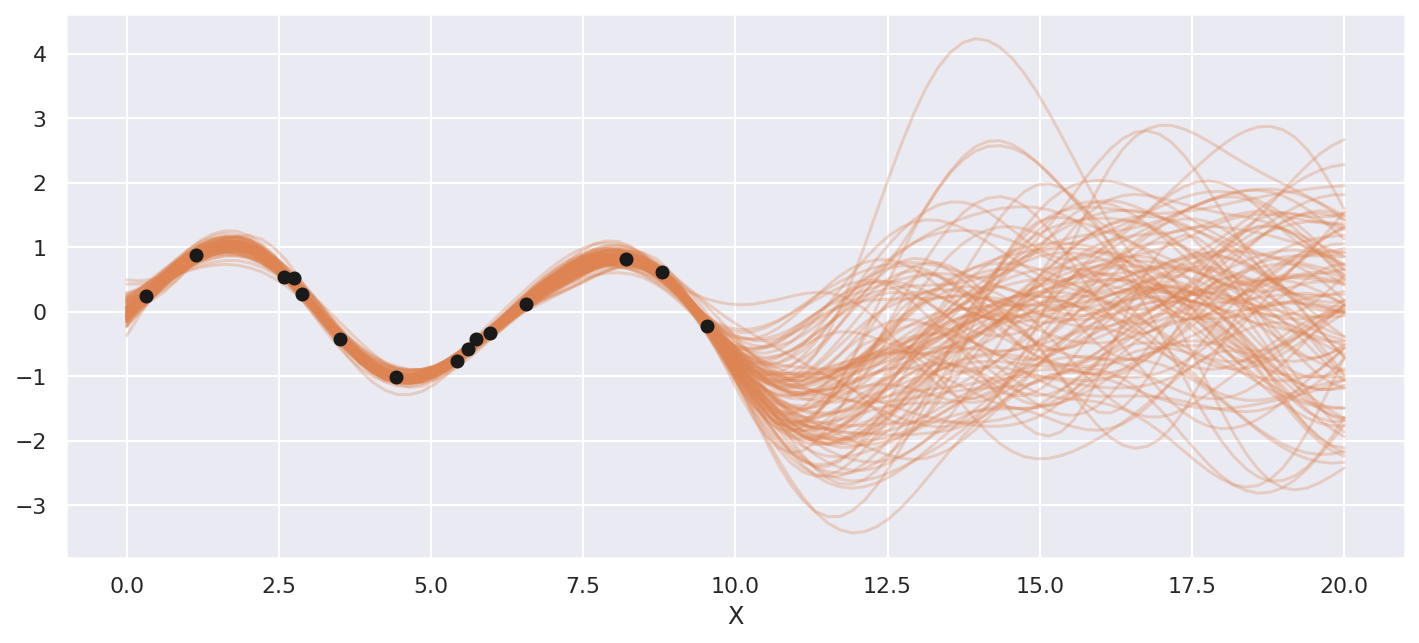

In [22]:
_, ax = plt.subplots(figsize=(12,5))
ax.plot(X_new, pred_samples['f_pred'].T, 'C1-', alpha=0.3)
ax.plot(X, y, 'ko')
ax.set_xlabel('X')
plt.show()

Поскольку значения выше 10 не подтверждены никакими данными, уровень неопределенности здесь намного выше. Вероятно, на это также влияет априорно заданное экспоненциальное квадратичное ядро `ExpQuad` для гауссова процесса.

Task 5.

---
Еще раз выполните упражнение 1, но на этот раз используйте линейное
ядро (изучите соответствующий код для линейного ядра).

In [23]:
def linear_kernel(x, knots, c):
    """linear kernel:
       k(x, x') = (x - c)(x' - c)
    """
    return np.array([(x-c)*(k-c) for k in knots])

[-2.10066645 -0.84504597  0.99937871 -1.7477773 ]


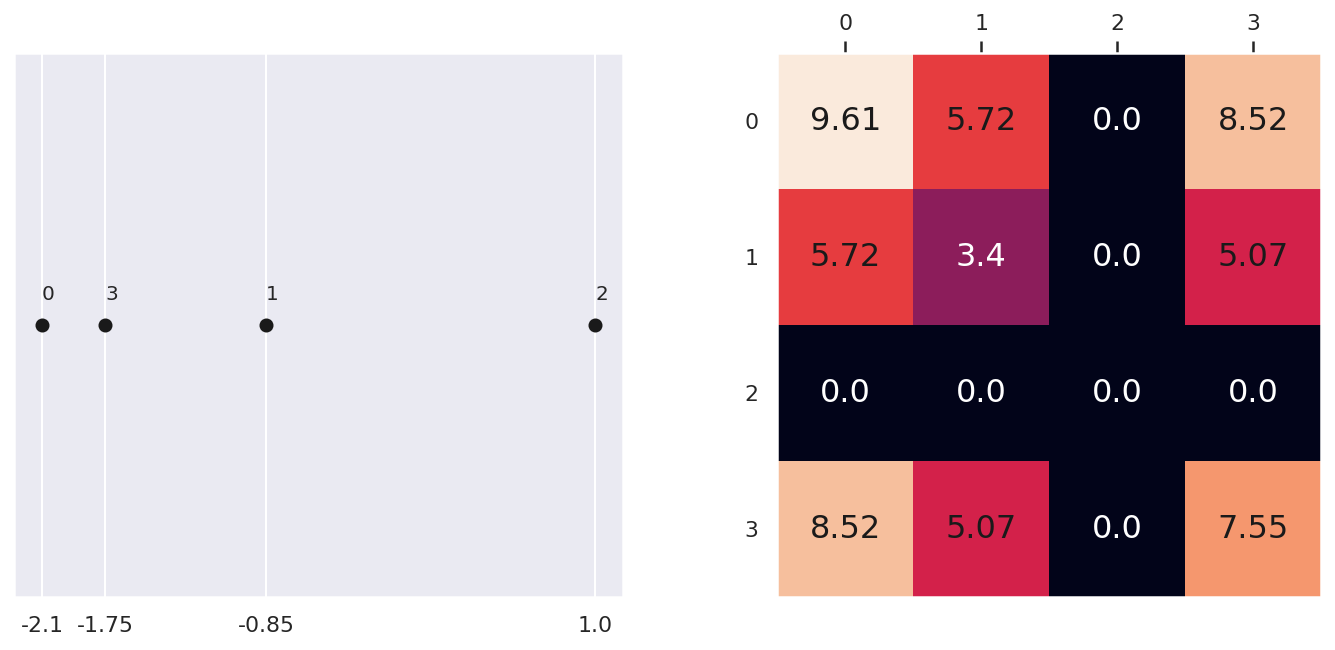

In [24]:
data = np.random.normal(size=4)
cov = linear_kernel(data, data, 1)
plot_kernel_result(data, cov)
print(data)

[0.87276421 0.37748452 0.53353753 0.21392634]


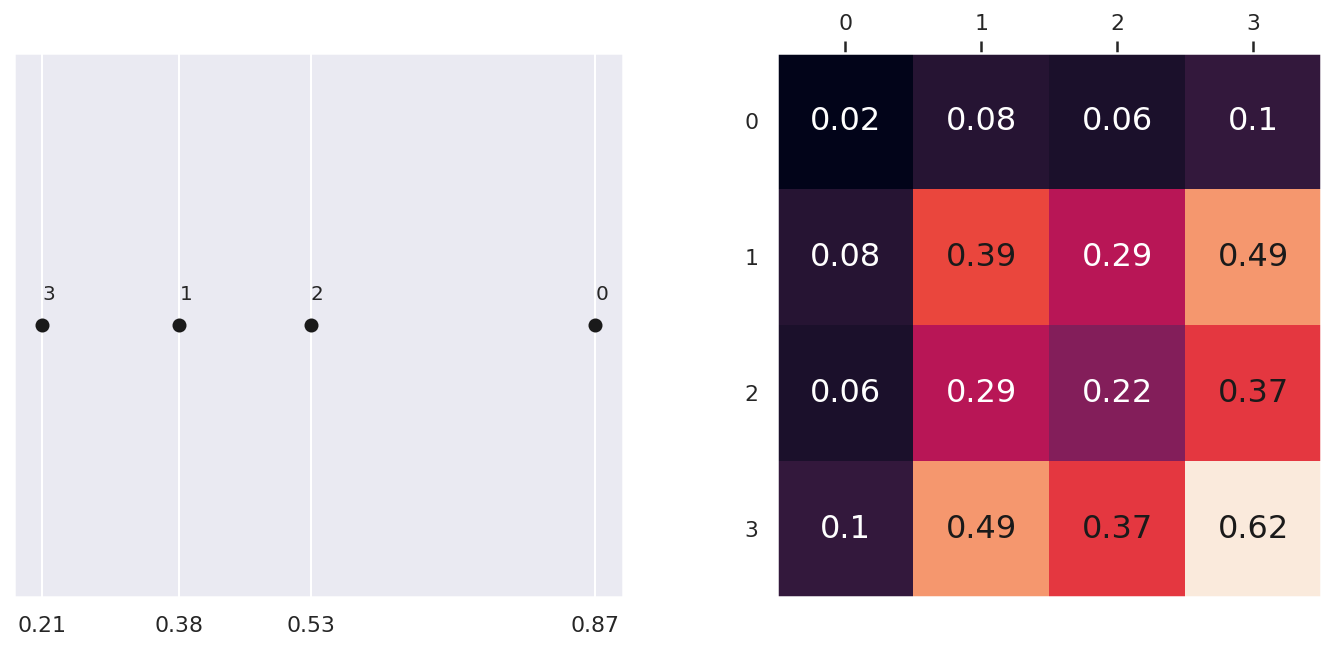

In [25]:
data = np.random.uniform(size=4)
cov = linear_kernel(data, data, 1)
plot_kernel_result(data, cov)
print(data)

Соответственно, с помощью ядра мы выбираем функцию соотношения точек между собой заданном пространстве.

Task 6.

---
Изучить раздел документации PyMC3:
https://docs.pymc.io/notebooks/GP-MeansAndCovs.html

#### Mean:

The following mean functions are available in PyMC3.

    * gp.mean.Zero
    * gp.mean.Constant
    * gp.mean.Linear


* The default mean functions for all GP implementations in PyMC3 is Zero.

* Custom mean function:

```python
import theano.tensor as tt

class Constant(pm.gp.mean.Mean):

    def __init__(self, c=0):
        Mean.__init__(self)
        self.c = c

    def __call__(self, X):
        return tt.alloc(1.0, X.shape[0]) * self.c
```
#### Covariance:

    * ExpQuad
    * WhiteNoise
    * Constant
    * Rational Quadratic
    * Exponential
    * Matern 5/2
    * Matern 3/2
    * Matern 1/2
    * Cosine
    * Linear
    * Polynomial
    
* A covariance function cov can be multiplied with numpy matrix, as long as the shapes are appropriate.
* Covariance can be warped with `WarpedInput`.
* The `WarpedInput` kernel can be used to create the `Periodic` covariance. This covariance models functions that are periodic, but are not an exact sine wave.
* `pm.gp.cov.Periodic` kernel
* `pm.gp.cov.Circular` kernel is similar to `Periodic` one but has an additional nuisance parameter
* The `Gibbs` covariance function applies a positive definite warping function to the lengthscale. Similarly to WarpedInput, the lengthscale warping function can be specified with parameters that are either fixed or random variables.
* One can construct a new kernel or covariance function by multiplying some base kernel by a nonnegative function. This is useful for specifying covariance functions whose amplitude changes across the domain.
* The `pm.gp.cov.ScaledCov` kernel can be used to create the Changepoint covariance. This covariance models a process that gradually transitions from one type of behavior to another.
* You can combine different covariance functions to model complex data.

* Defining a custom covariance function:

```python
class WhiteNoise(pm.gp.cov.Covariance):
    def __init__(self, sigma):
        super(WhiteNoise, self).__init__(1, None)
        self.sigma = sigma

    def diag(self, X):
        return tt.alloc(tt.square(self.sigma), X.shape[0])

    def full(self, X, Xs=None):
        if Xs is None:
            return tt.diag(self.diag(X))
        else:
            return tt.alloc(0.0, X.shape[0], Xs.shape[0])

```

Task 7.

---

Выполните модель логистической регрессии для данных `space_flu`. 

Что вы наблюдаете? Можете ли вы объяснить полученный результат?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


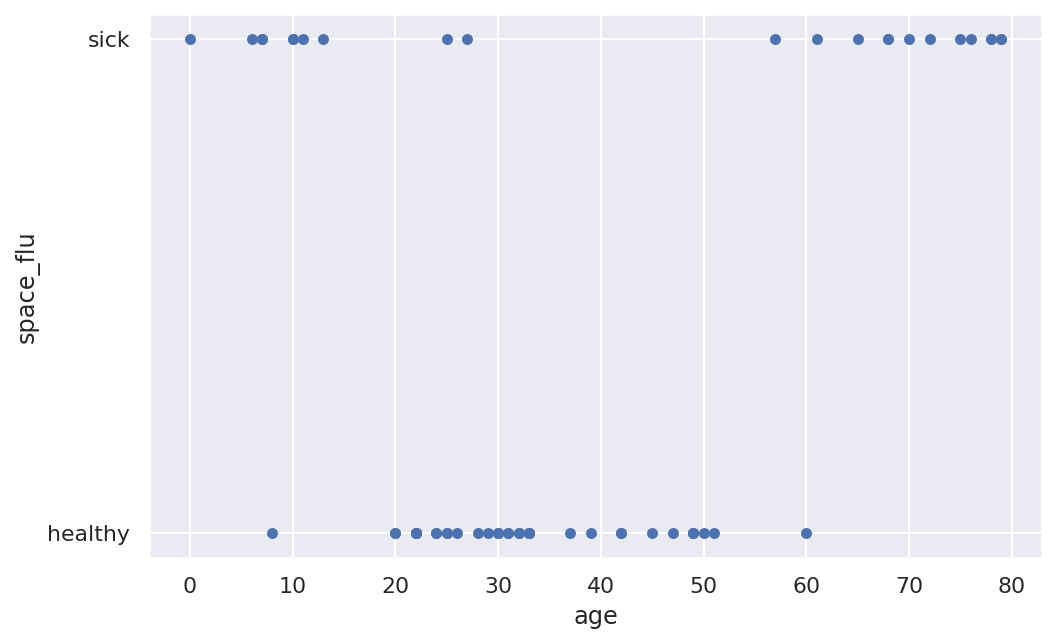

In [26]:
df_sf = pd.read_csv('../data/space_flu.csv')
age = df_sf.age.values[:, None]
space_flu = df_sf.space_flu

ax = df_sf.plot.scatter('age', 'space_flu', figsize=(8, 5))
ax.set_yticks([0, 1])
ax.set_yticklabels(['healthy', 'sick'])
plt.show()

In [27]:
def maxmin_scale(array):
    maxval = array.max()
    minval = array.min()
    rangeval = maxval- minval
    return np.array([(maxval-x)/rangeval for x in array]), maxval, rangeval

def maxmin_unscale(array, maxval, rangeval):
    return np.array([maxval-x*rangeval for x in array])

In [38]:
age_c, age_maxval, age_rangeval  = maxmin_scale(age)
age_c = age_c.ravel()
y_obs = space_flu.values

In [39]:
age_c.shape

(60,)

In [40]:
y_obs.shape

(60,)

In [41]:
with pm.Model() as logreg_model:
    
    # Априорные рапсределения параметров линейной модели
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    
    mu = alpha + pm.math.dot(age_c.ravel(), beta)
    theta = pm.Deterministic('theta', pm.math.sigmoid(mu))
    
    bd = pm.Deterministic('bd', -alpha/beta)
    
    yl = pm.Bernoulli('yl', p=theta, observed=y_obs)
    
    trace_logreg = pm.sample()

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [42]:
az.summary(trace_logreg, var_names=['alpha', 'beta'])

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,0.626,0.612,-0.557,1.773,0.022,0.016,747.0,747.0,754.0,873.0,1.0
beta,-2.193,1.082,-4.234,-0.195,0.040,0.028,739.0,739.0,740.0,857.0,1.0


/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>]], dtype=object)

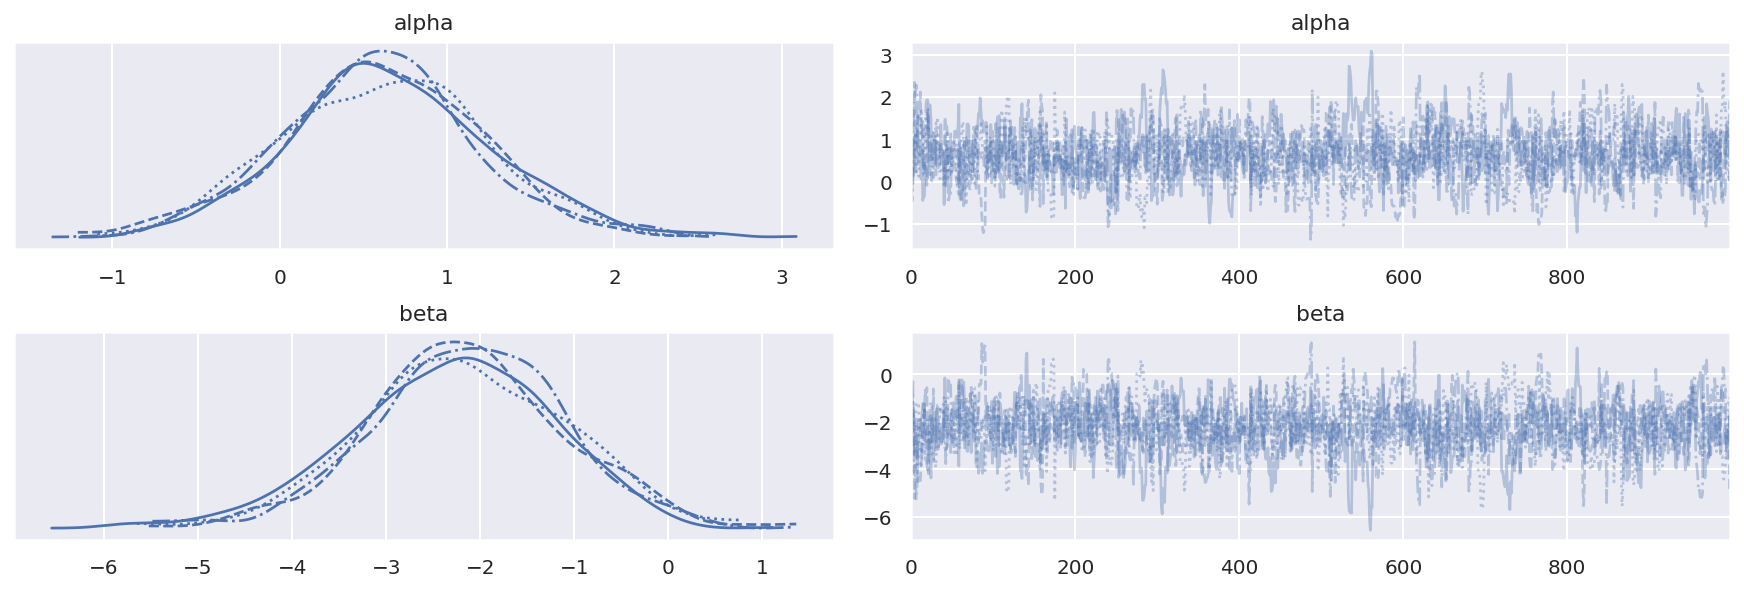

In [43]:
az.plot_trace(trace_logreg, var_names=['alpha', 'beta'])

Посмотрим на сигмоиду и разделяющую гиперплоскость

In [44]:
idx = np.argsort(age_c.ravel())
theta_vals = trace_logreg['theta'].mean(axis=0)

In [45]:
idx

array([ 4,  9, 39,  7, 24, 23, 16, 29, 35, 20, 15, 28, 30,  8, 13, 48, 33,
       19,  0, 11, 31, 22, 51, 57, 40, 55, 47,  5, 52, 10, 18, 49, 54, 53,
       43, 58, 17, 26, 59, 37,  3, 46, 34, 41, 27, 56, 38,  1, 32, 42, 21,
       44, 14, 50,  2,  6, 25, 45, 12, 36])

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/stats/stats.py:341: UserWarning: hpd will be deprecated Please replace hdi
  ("hpd will be deprecated " "Please replace hdi"),
/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/stats/stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


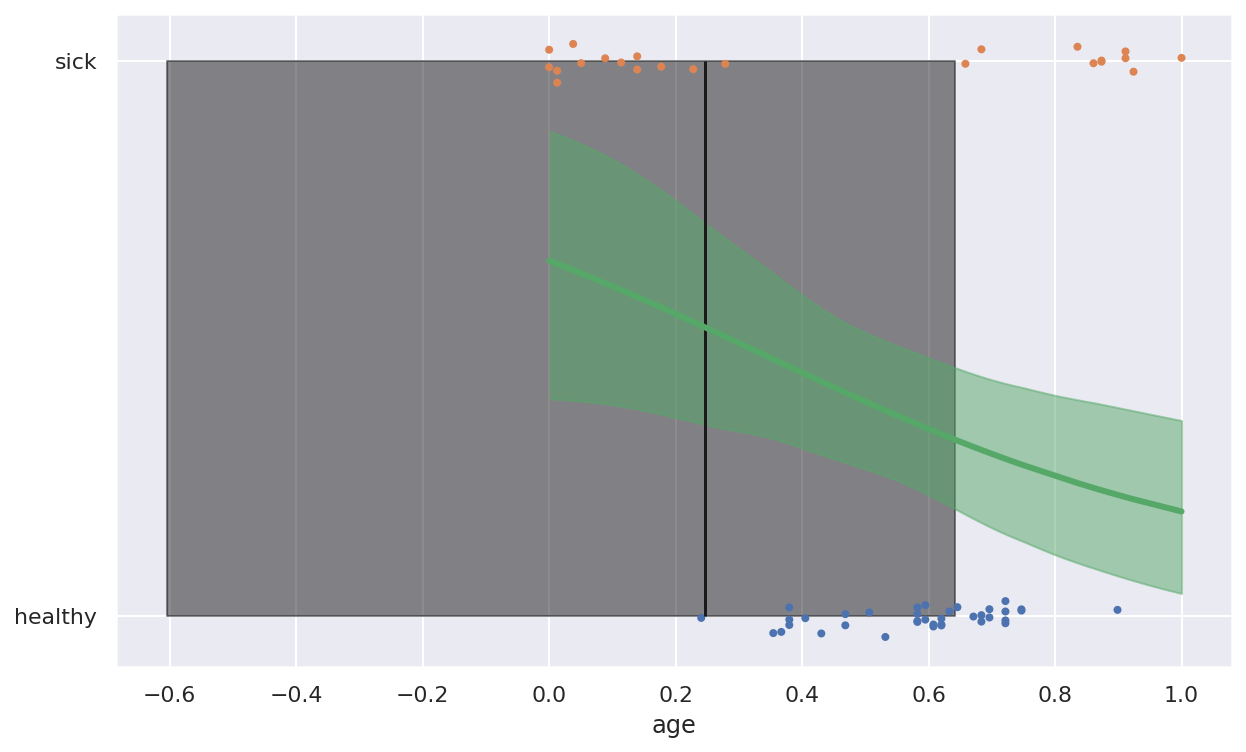

In [50]:
_, ax = plt.subplots(figsize=(10,6))

plt.plot(age_c[idx], theta_vals[idx], color='C2', lw=3)

# Decision boundary
db_mean = trace_logreg['bd'].mean()
ax.vlines(db_mean, 0, 1, color='k')
bd_hpd = az.hpd(trace_logreg['bd'])
ax.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='k', alpha=0.5)

# Scatter plot
ax.scatter(age_c,
           np.random.normal(y_obs.ravel(), 0.02), 
           marker='.', color=[f'C{x}' for x in y_obs.ravel()]
           )

# Logistic hpd
az.plot_hpd(age_c, trace_logreg['theta'], color='C2')

ax.set_yticks([0, 1])
ax.set_yticklabels(['healthy', 'sick'])
ax.set_xlabel('age')
plt.show()

Наблюдается неадекватная гиперплоскость и логистическая кривая. Проблема в хвостах данных, где в обоих случаях риск заболеть больше.


Task 8:

---

Используйте полином второго порядка в Task 7.

In [104]:
age_c, _, _ = maxmin_scale(age)
age_q = age**2
age_cq, _, _  = maxmin_scale(age_q)

y_obs = space_flu.values
x_data = np.array([age_c.reshape(-1), age_cq.reshape(-1)]).T

In [107]:
with pm.Model() as poly_logreg:
    
    # Априорные рапсределения параметров линейной модели
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=2, shape=x_data.shape[1])
    
    mu = alpha + pm.math.dot(x_data, beta)
    theta = pm.Deterministic('theta', pm.math.sigmoid(mu))
    
    bd = pm.Deterministic('bd', 
                          -alpha/beta[1] - (beta[0]/beta[1]*x_data[:, 0])
                          )
    
    yl = pm.Bernoulli('yl', p=theta, observed=y_obs)
    
    trace_plogreg = pm.sample(4000)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 6 seconds.


In [108]:
az.summary(trace_plogreg, var_names=['alpha', 'beta'])

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,1.390,0.686,0.085,2.638,0.009,0.006,6491.0,5942.0,6564.0,7017.0,1.0
beta[0],1.491,1.506,-1.451,4.193,0.019,0.014,6220.0,5443.0,6224.0,6259.0,1.0
beta[1],-3.840,1.381,-6.431,-1.219,0.018,0.013,5992.0,5859.0,6003.0,6412.0,1.0


In [109]:
idx = np.argsort(x_data[:, 0].ravel())
theta_vals = trace_plogreg['theta'].mean(axis=0)

In [110]:
theta_vals.shape

(60,)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/stats/stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


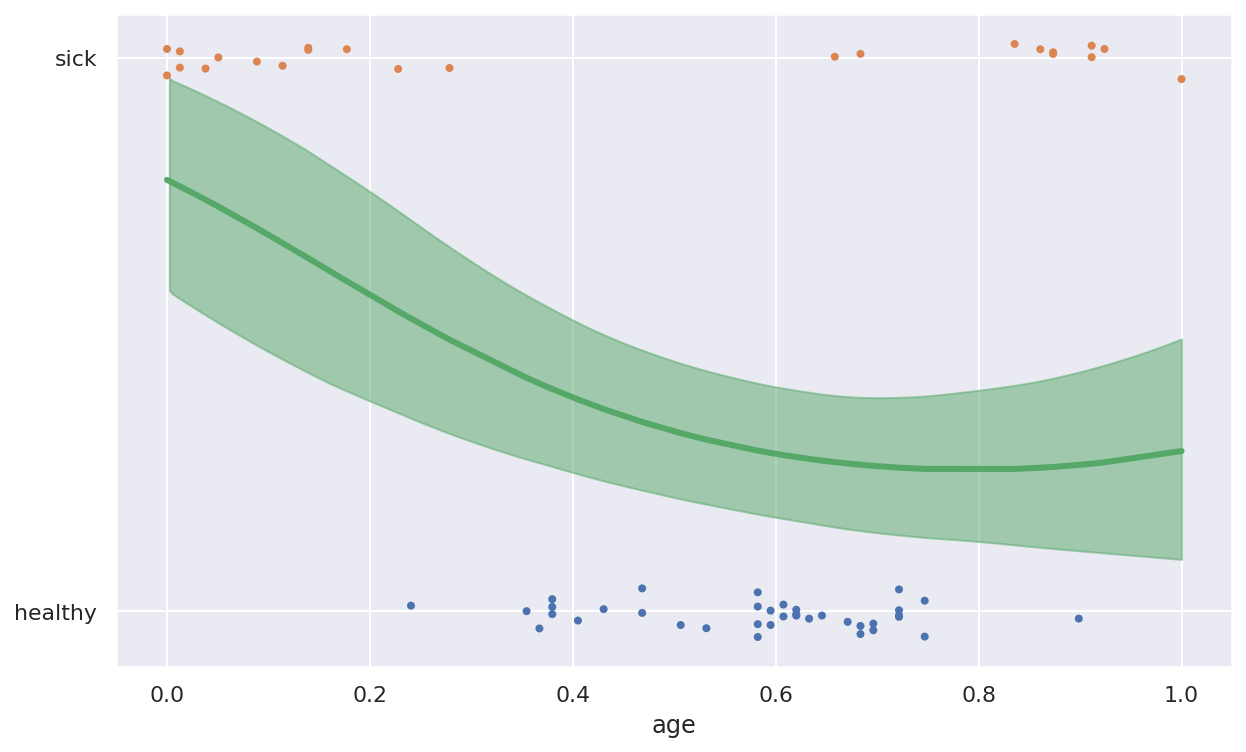

In [111]:
_, ax = plt.subplots(figsize=(10,6))


# Logistic curve
plt.plot(x_data[:, 0][idx], theta_vals[idx], color='C2', lw=3)

# Scatter plot
ax.scatter(x_data[:, 0], np.random.normal(y_obs.ravel(), 0.02), 
           marker='.', color=[f'C{x}' for x in y_obs.ravel()]
           )

# Logistic hpd
az.plot_hpd(x_data[:, 0], trace_plogreg['theta'], color='C2')


ax.set_yticks([0, 1])
ax.set_yticklabels(['healthy', 'sick'])
ax.set_xlabel('age')
plt.show()

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/stats/stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


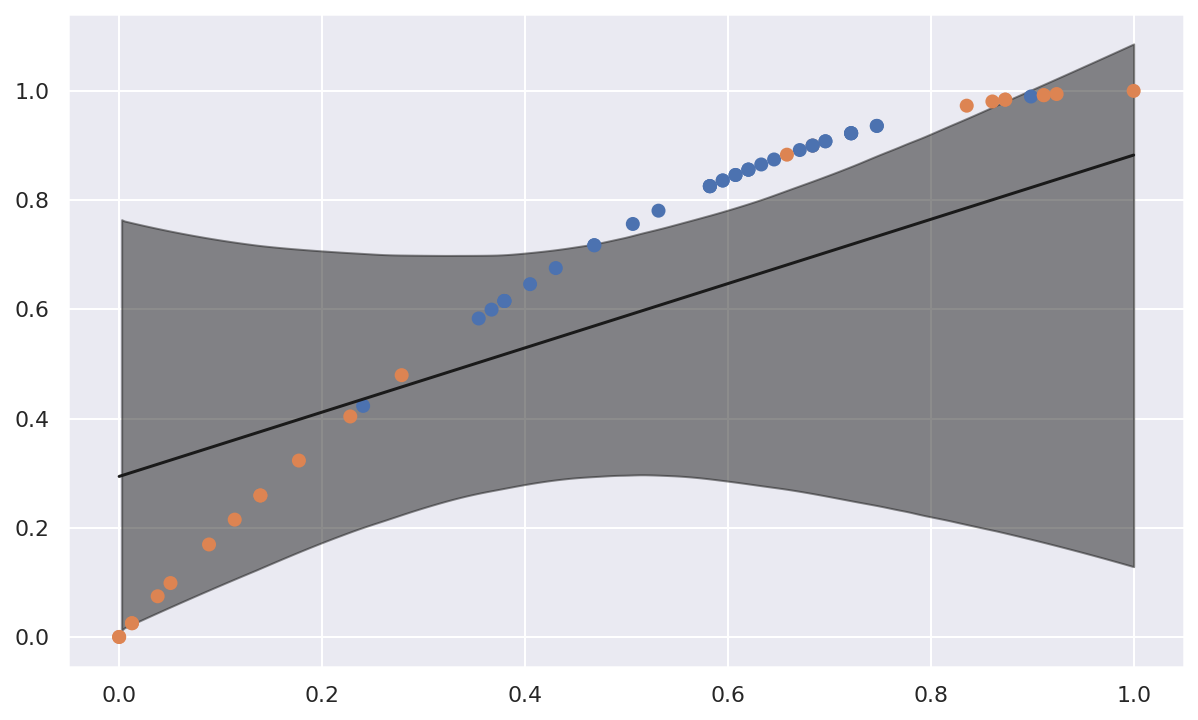

In [116]:
_, ax = plt.subplots(figsize=(10,6))


idx = np.argsort(x_data[:, 0])

bd = trace_plogreg['bd'].mean(0)[idx]

plt.plot(x_data[:,0][idx], bd, color='k')
az.plot_hpd(x_data[:,0], trace_plogreg['bd'], color='k')

plt.scatter(x_data[:,0], x_data[:,1], c=[f'C{x}' for x in y_obs.ravel()])
plt.show()

С квадратом признака удалось лучше обработать особенность данных. Разделяющая гиперплоскость отделяет множества точек. Однако результат не сравним с моделью на оснвое гауссовых процессов.

Task 9.

---


Сравните используемую в этой главе модель катастроф в угледобывающей промышленности с той же моделью, описанной в документации библиотеки PyMC3 (https://docs.pymc.io/notebooks/getting_started.html#Case-study-2:-Coal-mining-disasters). Опишите и объясните различия между этими моделями с точки зрения определения моделей и получаемых
результатов.


Альтернативная постановка задачи:

$D_t = Poisson(r_t),$
$r_t=\left\{
    \begin{array}{ll}
      e, & \mbox{if $t \le s$}.\\
      l, & \mbox{if $t > s$}.
    \end{array}
    \right.
$

$s \sim Uniform(t_l, t_h),$\
$e \sim exp(1),$\
$l \sim exp(1).$

* Используется `pm.math.switch` для моделирования switchpoint - структурного сдвига.
* В данных добавлены пропуски.
* Постановка задачи с поиском структурного сдвига switchpoint не позволяет использовать NUTS семплинг, потому что switchpoint-дискретная переменная, поэтому применяется adaptive Metropolis-Hastings, работающих с дискретными переменными.
* Основной результат - нахождение вероятностного интервала, в рамках которого проходил структурный сдвиг в частоте катастроф. 